<font size=48>Machine Learning</font><br>

## Lab05 - Dimension Reduction Using Principal Component Analysis (PCA) 

## Overview of Original Lab

1. PCA Overview: A general explanation of PCA im paragraph form.

2. Where Can You Apply PCA?: A section explaining PCA's applications.

3. What is PCA?: A deeper dive into PCA's mathematical foundations.

4. Understanding the Data: Introduction to two datasets : Breast Cancer & CIFAR-10.

5. Breast Cancer Data Exploration.

6. Data Visualization Using PCA (Breast Cancer Dataset).

7. Preprocessing: Data Normalization.

8. CIFAR-10 Data Exploration.

9. Data Visualization Using PCA (CIFAR-10 Dataset).

10. Deep Learning Training with CIFAR-10:

11. Training With PCA.

12. Training Without PCA.

13. Lab Exercises (TO DO):

    1. Use a 3D scatterplot to plot the first three principal components of the CIFAR-10 dataset.

    2. Experiment with different batch sizes, epochs, and dataset sizes for training/testing.

    3. Use appropriate plots to compare results, performance, and speed of models with and without PCA.


## Overview of Enhanced Lab Exercise

1. Introduction to PCA (Improved and Expanded)
2. Interactive PCA Visualizations with Widgets (Improved on CIFAR-10 Dataset Understanding)
3. PCA with Time Series Data 
4. PCA for Feature Engineering
5. Added Extra and refined lab exercises with detailed explanation on requirements


## <font color='lightblue'>Introduction to PCA (Improved) </font>

- Why Dimension Reduction?

    - The curse of dimensionality refers to the challenges associated with high-dimensional data, such as increased computational complexity and difficulty in visualizing data. PCA reduces data dimensions while preserving its variance, making it easier to analyze and visualize. In high-dimensional datasets, more dimensions typically lead to higher computational cost and risk of overfitting. By reducing the number of dimensions, PCA allows for faster processing and better generalization.

<br>

- Real-World Examples of PCA:

    - Image Compression: PCA reduces the dimensionality of image data while preserving important features, making it suitable for compression.
    - Genetics: PCA is used to identify patterns in genetic data and reduce the complexity of gene expression datasets.
    - Stock Market Analysis: PCA helps reduce the number of financial indicators by finding the principal components that capture most of the data's variance, making analysis more efficient.

## <font color='lightblue'>Interactive PCA Visualization with Widgets </font> (New)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import ipywidgets as widgets
from ipywidgets import interactive

# Load dataset (Breast Cancer dataset as an example)
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create PCA function for interactive visualization
def pca_plot(n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Plotting explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.7, color='blue')
    plt.title(f"Explained Variance Ratio for {n_components} Components")
    plt.xlabel("Principal Components")
    plt.ylabel("Variance Explained")
    plt.show()

    # 2D Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
    plt.title('PCA: Breast Cancer Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Target Class')
    plt.show()

# Create interactive widget
interactive_plot = interactive(pca_plot, n_components=widgets.IntSlider(min=2, max=10, step=1, value=2))
interactive_plot


interactive(children=(IntSlider(value=2, description='n_components', max=10, min=2), Output()), _dom_classes=(…

In [2]:
## Install yfinance
%pip install yfinance
%pip install --upgrade certifi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 320.6 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-macosx_11_0_arm64.whl size=264278 sha256=27121d15c3ed2554958663d0b5a303b863b097e0646513bcefe8dd8afc65510e
  Stored in directory: /Users/bryanlim/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.8.30
    Uninstalling certifi-2024.8.30:
      Successfully uninstalled certifi-2024.8.30
Note: you may need to restart the kernel to use updated packages.


## <font color='lightblue'>Introduction to PCA (Improved) </font>

[*********************100%***********************]  2 of 2 completed


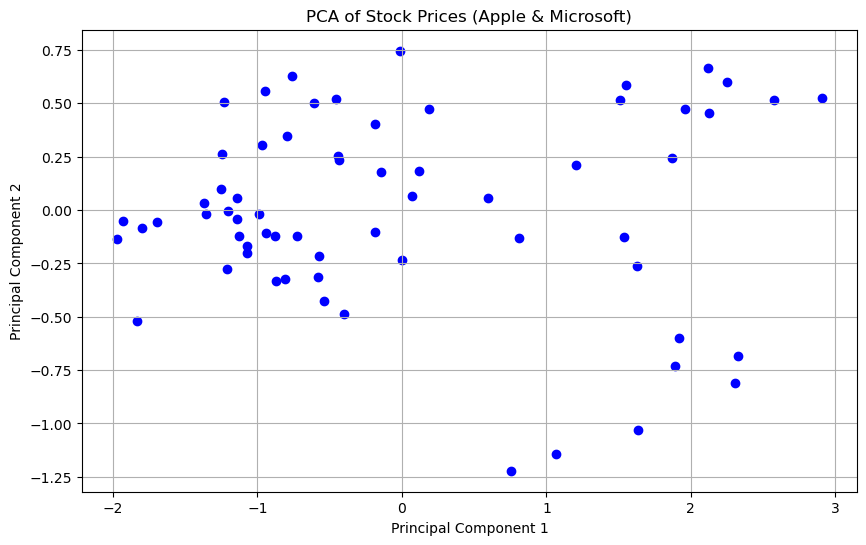

Explained Variance Ratio: [0.90036764 0.09963236]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import yfinance as yf

# Download stock data (e.g., for Apple and Microsoft over the last 3 months)
tickers = ['AAPL', 'MSFT']
data = yf.download(tickers, start="2024-10-01", end="2025-01-01")['Close']

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualize the result
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], color='blue')
plt.title('PCA of Stock Prices (Apple & Microsoft)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Explained variance ratio
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')


## <font color='lightblue'>Reconstruction of Data from Principal Components (New) </font>

In [4]:
# Reconstruct data from the first few principal components
def pca_reconstruction(n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Reconstruct the data
    X_reconstructed = pca.inverse_transform(X_pca)

    # Compare original vs. reconstructed data
    plt.figure(figsize=(10, 6))
    plt.plot(X_scaled[:, 0], label='Original Data (First Feature)')
    plt.plot(X_reconstructed[:, 0], label='Reconstructed Data (First Feature)', linestyle='dashed')
    plt.legend()
    plt.title(f'Reconstruction from {n_components} Principal Components')
    plt.show()

# Interactive widget for selecting number of components
interactive_reconstruction = interactive(pca_reconstruction, n_components=widgets.IntSlider(min=1, max=10, step=1, value=2))
interactive_reconstruction

interactive(children=(IntSlider(value=2, description='n_components', max=10, min=1), Output()), _dom_classes=(…

## <font color='lightblue'>PCA for Feature Engineering (New) </font>

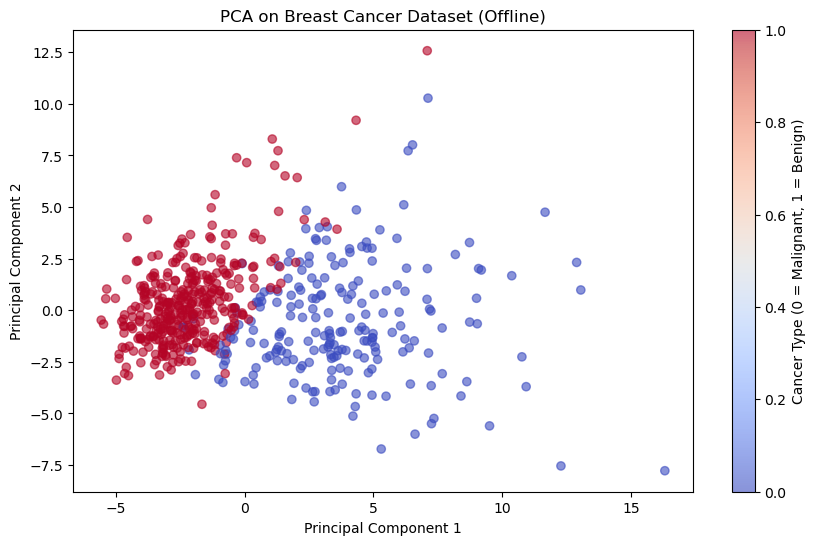

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset (offline)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Target: 0 = Malignant, 1 = Benign

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 5 components)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('PCA on Breast Cancer Dataset (Offline)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cancer Type (0 = Malignant, 1 = Benign)')
plt.show()



## <font color='lightblue'>Lab Exercise (Improved) </font>

##### 1. Visualizing PCA in Action (Step-by-Step Projection)

##### Task:

1. Use the Iris dataset (or any dataset with three features).
2. Perform PCA step by step and visualize:
3. The original data distribution in 3D.
4. The projection onto 2D and 1D spaces.
5. Show how much variance is retained at each step.

##### 2. Feature Importance in PCA: Understanding Principal Components

##### Task:

1. Use the Wine dataset (or any dataset with multiple numerical features).
2. Perform PCA and plot the explained variance ratio for each principal component.
3. Identify the features that contribute most to each principal component using component loadings.
4. Analyze which features are most important in defining the dataset structure.

##### 3. Impact of Normalization on PCA Results

##### Task:

1. Use the Breast Cancer dataset (or any other dataset).
2. Apply PCA to raw data and visualize the principal components.
3. Compare results after applying:
  - Min-Max Scaling
  -  Standardization (Z-score scaling)
  -  No scaling
4. Discuss how different preprocessing methods affect PCA results.